In [ ]:
from google.colab import drive
drive.mount('/drive')

from csv import reader
import pandas as pd
import ast

Mounted at /drive


In [ ]:
test = pd.read_csv('http://sybmo.com/thesis/test.csv')
test.tokens = test.tokens.apply(ast.literal_eval)
test.labels = test.labels.apply(ast.literal_eval)


final_list_tokens = []
final_list_labels = []

with open("/drive/My Drive/thesis_sybren/BERTs/toxicBERT/toxicBERT-3epoch.csv", "r") as read_obj:
    csv_reader = reader(read_obj)
    # iterate over each row in the csv using reader object
    breaki = 0
    for row in csv_reader:
        # declare emtpy lists for every row
        words = []
        labels = []
        # row variable is a list that represents a row in csv
        for element in row:
            # turn string representation of tuple into real tuple
            element = ast.literal_eval(str(element))
            # append every first element of tuple to words list
            # if element[0] == "\u200d":
            #     print(row)
            words.append(element[0])

            # check if words start with bracket or double hashtag in order to only keep the right labels
            if not (element[0].startswith("[C") or element[0].startswith("##") or element[0].startswith("[S") ):
                labels.append(element[1])

        #remove "tokens" that start with bracket ([CLS] and [SEP] (but keep [UNK]))
        text = ' '.join([x for x in words if not (x.startswith('[C') or x.startswith('[S'))])
        clean_text = text.replace(' ##', '')


        split_fine_text = clean_text.split()

        # this piece of code finds emojis and removes them from the list
        # and removes the labels at given index
        for index, token in enumerate(split_fine_text):
            encoded_token = token.encode('utf8')
            if 'xf' in str(encoded_token):
                split_fine_text.pop(index)
                labels.pop(index)

        final_list_tokens.append(split_fine_text)
        final_list_labels.append([int(x[-1]) for x in labels])

        # breaki+=1
        # #if breaki > 10:
        #  #   break


# flatten the lists
preds = [item for sublist in final_list_labels for item in sublist]
gold = [item for sublist in test.labels.to_list() for item in sublist]
tokens_gold = [item for sublist in test.tokens.to_list() for item in sublist]
reconstructed_flat = [item for sublist in final_list_tokens for item in sublist]

In [ ]:
print(len(tokens_gold),len(reconstructed_flat),len(gold),len(preds))

for index,token in enumerate(tokens_gold):
    if token == "\u200d":
        gold.pop(index)
        tokens_gold.pop(index)
        #preds.pop(index)

print(len(tokens_gold),len(reconstructed_flat),len(gold),len(preds))

14206 14205 14206 14205
14205 14205 14205 14205


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(gold, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     12493
           1       0.66      0.66      0.66      1192
           2       0.61      0.70      0.65       520

    accuracy                           0.93     14205
   macro avg       0.75      0.78      0.76     14205
weighted avg       0.93      0.93      0.93     14205



In [ ]:
print(classification_report(gold, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     12493
           1       0.66      0.66      0.66      1192
           2       0.61      0.70      0.65       520

    accuracy                           0.93     14205
   macro avg       0.75      0.78      0.76     14205
weighted avg       0.93      0.93      0.93     14205



In [ ]:
report = classification_report(gold, preds, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)

              precision    recall  f1-score       support
0              0.968687  0.963259  0.965966  12493.000000
1              0.664701  0.661913  0.663304   1192.000000
2              0.611765  0.700000  0.652915    520.000000
accuracy       0.928335  0.928335  0.928335      0.928335
macro avg      0.748384  0.775057  0.760728  14205.000000
weighted avg   0.930113  0.928335  0.929108  14205.000000


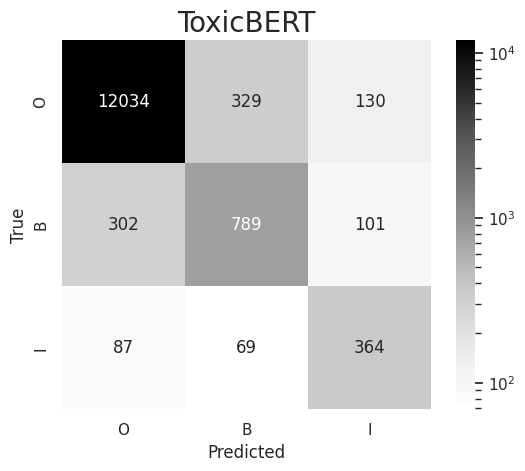

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style='white')
from matplotlib.colors import LogNorm, Normalize
cm = metrics.confusion_matrix(gold, preds, labels=[0,1,2])
sns.heatmap(cm, cmap='Greys',annot=True,fmt='d',square=True, norm=LogNorm(), yticklabels = ['O','B','I'], xticklabels=['O','B','I']);

plt.xlabel('Predicted')
plt.ylabel('True')

plt.title("ToxicBERT", fontsize =20)

plt.savefig('toxicBert_CM_v3.pdf',dpi=200)
plt.show()

In [ ]:
cm

array([[12034,   329,   130],
       [  302,   789,   101],
       [   87,    69,   364]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

report = classification_report(gold, preds, output_dict=True)
df = pd.DataFrame(report).transpose()
display(df)
df.to_latex()


In [ ]:
zipped_list_labels = []

for sent_index,sentence in enumerate(final_list_tokens):
    sent_list = []
    for token_index, token in enumerate(sentence):
        sent_list.append((token, final_list_labels[sent_index][token_index]))
    zipped_list_labels.append(sent_list)

import csv
with open("/drive/My Drive/thesis_sybren/BERTs/toxicBERT/reconstructed_preds_toxicBERT.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zipped_list_labels)

In [ ]:
# for index, token in enumerate(reconstructed_flat):
#     if token != tokens_gold[index]:
#         print(index,tokens_gold[index], token, gold[index], preds[index])

In [ ]:
# flat_aligned_tokens = [item for sublist in final_list_tokens for item in sublist]
# len(pd.Series(flat_aligned_tokens)[pd.Series(flat_aligned_tokens)=='[UNK]'])

151